In [6]:
%matplotlib inline

import datetime as dt

from romspy.profiles import *

freefile = '/Users/teruhisa/Dropbox/Data/2014master/NL/osaka-bay_sta.nc'
assifile = '/Users/teruhisa/Dropbox/Data/2014master/I4DVAR/osaka-bay_sta_0168.nc'
obsfile = '/Users/teruhisa/Dropbox/Data/ob500_obs_2012_obweb-2.nc'


def fennelP(dtime, station, freefile=None, assifile=None, obsfile=None, pngfile=None):

    #varnames = ['temp', 'salt', 'chlorophyll', 'NO3', 'NH4', 'PO4', 'oxygen']
    #varnames = ['temp', 'salt', 'chlorophyll', 'TN', 'TP', 'PP', 'oxygen']
    #varnames = ['temp', 'salt', 'chlorophyll', 'PO4', 'LdetritusP', 'SdetritusP', 'oxygen']
    #varnames = ['temp', 'salt', 'chlorophyll', 'DIN', 'DetritusN', 'PO4', 'DetritusP', 'oxygen']
    varnames = ['temp', 'salt', 'chlorophyll', 'oxygen']#, 'DIN', 'DetritusN', 'PO4', 'DetritusP']
    colors = ['c', 'k', 'g', 'b', 'r', 'r', 'm', 'm']
    c = {name:c for name, c in zip(varnames, colors)}

    # read

    if freefile is not None:
        fvar, fdepth = read_sta(freefile, dtime, station, varnames)
    if assifile is not None:
        avar, adepth = read_sta(assifile, dtime, station, varnames)
    if obsfile is not None:
        obs = read_obs(obsfile, dtime, station)

    # plot

    fig, ax = plt.subplots(1, len(varnames), figsize=[10,3])
    for i, varname in enumerate(varnames):
        if freefile is not None:
            plot_sta(varname, fvar, fdepth, ax[i], c, 'Free')
        if assifile is not None:
            plot_sta(varname, avar, adepth, ax[i], c, 'Assi')
        if obsfile is not None:
            plot_obs(varname, station, obs, ax[i])
        ax[i].grid()
        ax[i].set_ylim(-14,0)

    # settings

    ax[0].set_xlabel('Temperature [degC]')
    ax[1].set_xlabel('Salinity')
    ax[2].set_xlabel('Chlorophyll [mg m$^{-3}$]')
    ax[3].set_xlabel('Oxygen'+molO2)
    #ax[4].set_xlabel('DIN'+molN)
    #ax[5].set_xlabel('DetritusN'+molN)
    #ax[6].set_xlabel('PO4'+molP)
    #ax[7].set_xlabel('DetritusP'+molP)

    ax[0].tick_params(labelleft='on')
    ax[0].set_xlim(15,33)
    ax[1].set_xlim(15,33)
    ax[2].set_xlim(0,10.0)
    ax[3].set_xlim(0,500.0)
    #ax[4].set_xlim(0,5.0)
    #ax[5].set_xlim(0,5.0)
    #ax[6].set_xlim(0,1.0)
    #ax[7].set_xlim(0,1.0)

    # output

    fig.suptitle('Sta.'+str(station)+dtime.strftime(' %Y-%m-%d %H:%M'), fontsize=10)
    if pngfile is not None:
        strtime = dtime.strftime('%m%d%H')
        fig.savefig(pngfile.format(station, strtime), bbox_inches='tight', dpi=300)
    else:
        return ax


def profiles(station):
    ax = fennelP(time, station, freefile=freefile, assifile=assifile, obsfile=obsfile)
    ax[0].set_xlim(23,29)
    ax[1].set_xlim(25,33)
    ax[2].set_xlim(0,12)
    ax[3].set_xlim(0,300)
    #ax[3].set_xlim(0,0.1)
    #ax[4].set_xlim(0,0.1)
    #ax[5].set_xlim(0,0.1)
    #ax[6].set_xlim(0,20)

romspy.get_time(assifile)

/Users/teruhisa/Dropbox/Data/2014master/I4DVAR/osaka-bay_sta_0168.nc
2012-08-07 23:50:00 0
2012-08-08 00:50:00 6


/Users/teruhisa/Dropbox/Data/2014master/NL/osaka-bay_sta.nc
2012-08-01 00:00:00 - 2012-09-01 00:00:00
/Users/teruhisa/Dropbox/Data/2014master/I4DVAR/osaka-bay_sta_0168.nc
2012-08-07 23:50:00 - 2012-08-08 00:50:00
/Users/teruhisa/Dropbox/Data/ob500_obs_2012_obweb-2.nc
2012-01-01 00:00:00 - 2013-01-01 23:00:00
/Users/teruhisa/Dropbox/Data/2014master/NL/osaka-bay_sta.nc
2012-08-01 00:00:00 - 2012-09-01 00:00:00
/Users/teruhisa/Dropbox/Data/2014master/I4DVAR/osaka-bay_sta_0168.nc
2012-08-07 23:50:00 - 2012-08-08 00:50:00
/Users/teruhisa/Dropbox/Data/ob500_obs_2012_obweb-2.nc
2012-01-01 00:00:00 - 2013-01-01 23:00:00
/Users/teruhisa/Dropbox/Data/2014master/NL/osaka-bay_sta.nc
2012-08-01 00:00:00 - 2012-09-01 00:00:00
/Users/teruhisa/Dropbox/Data/2014master/I4DVAR/osaka-bay_sta_0168.nc
2012-08-07 23:50:00 - 2012-08-08 00:50:00
/Users/teruhisa/Dropbox/Data/ob500_obs_2012_obweb-2.nc
2012-01-01 00:00:00 - 2013-01-01 23:00:00
/Users/teruhisa/Dropbox/Data/2014master/NL/osaka-bay_sta.nc
2012-08-01

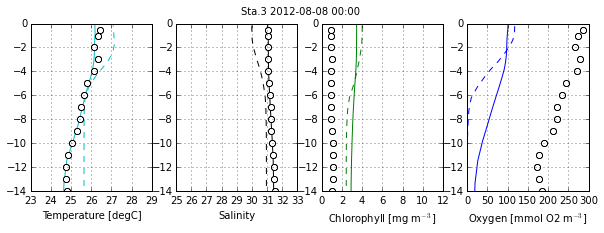

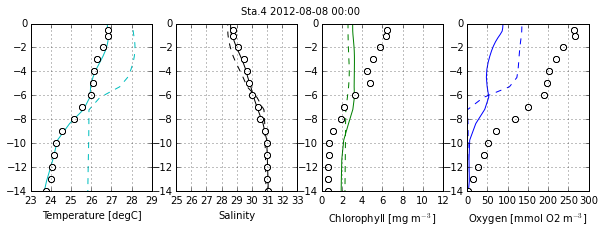

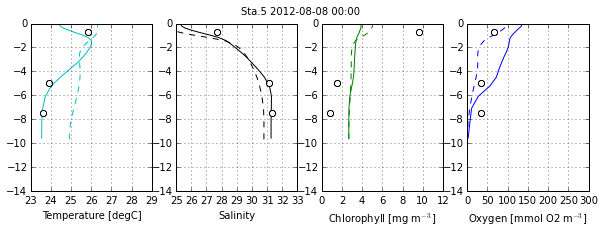

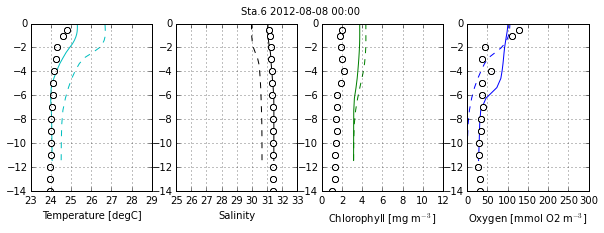

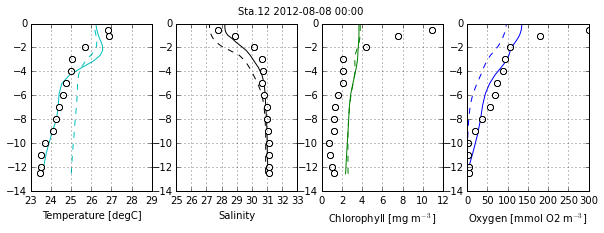

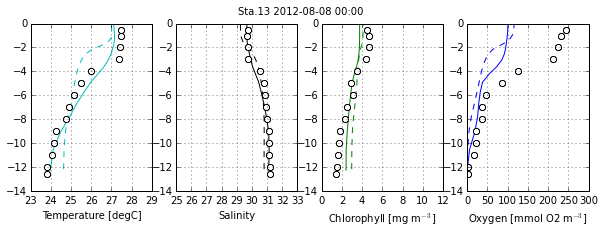

In [7]:
time = dt.datetime(2012,8,8,0)

for station in [3,4,5,6,12,13]:
    profiles(station)
    plt.savefig('profile{}.png'.format(station), bbox_inches='tight', dpi=300)